In [1]:
# you will need defdap, pyyaml, pooch installed
from defdap import hrdic, ebsd, experiment
import numpy as np
import matplotlib.pyplot as plt
from repo import repository

%matplotlib inline

# List all the projects in the yml folder

The yaml files contain the zenodo doi so that the data can be downloaded. It also includes the files names of the dic and ebsd maps, homologous points etc.

In [2]:
repository.printYamls(folder = 'yaml')

These are the yaml files in the yaml folder:

Rhys Thomas     | Zircaloy-4 with hydrides                      |  yaml/thomas_zr4_hydrides.yml   
Allan Harte     | Ni alloy with no gamma prime precipitates     |  yaml/harte_ni.yml              
Rhys Thomas     | Zircaloy-4 0.1 dpa irradiated                 |  yaml/thomas_zr4_irr.yml        


# Select a yaml file

In [3]:
yaml_file = 'yaml/thomas_zr4_irr.yml'
experiment_name = 'rd_irr'

exp = repository.loadData(yaml_file, experiment_name)

Loaded DaVis 8.4.0 data (dimensions: 2397 x 2397 pixels, sub-window size: 16 x 16 pixels)
Loaded DaVis 8.4.0 data (dimensions: 2397 x 2397 pixels, sub-window size: 16 x 16 pixels)
Loaded EBSD data (dimensions: 1210 x 1095 pixels, step size: 0.2 um)
Finished building quaternion array (0:00:01) 
Finished finding grain boundaries (0:00:02) 
Finished finding grains (0:00:01) 
Finished finding grains (0:00:01) 
Finished finding grains (0:00:01) 


# Plot the maps

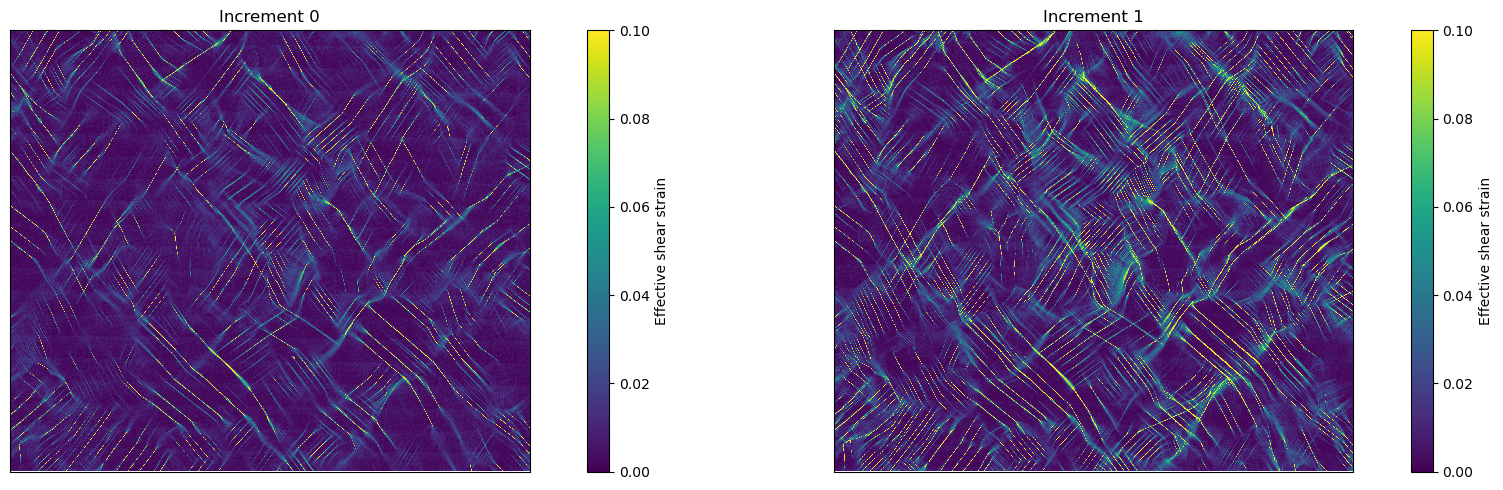

In [4]:
fig, ax = plt.subplots(1,len(exp.increments), figsize=(20,5))
ax=ax.ravel()

for inc, dic_map in exp.iter_over_maps('hrdic'):
    plot=dic_map.plot_map('max_shear', vmin=0, vmax=0.10, plot_scale_bar=False, fig=fig, ax=ax[inc])
    ax[inc].set_title('Increment {0}'.format(inc))
    plt.tight_layout()

# Plot the maps with grain boundaries

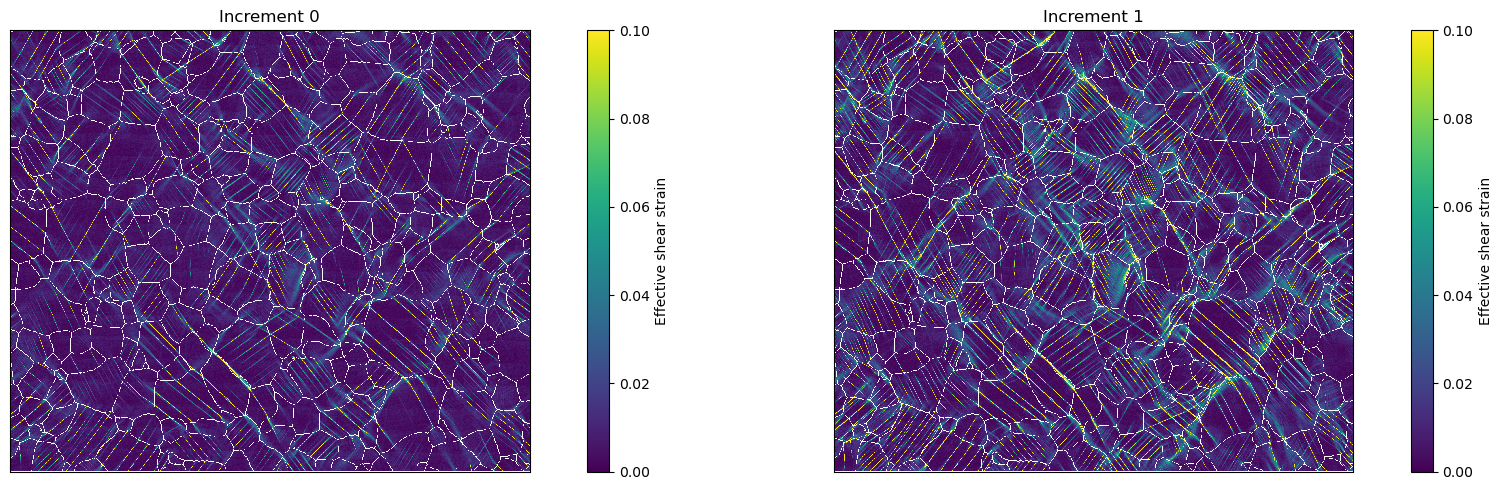

In [5]:
fig, ax = plt.subplots(1,len(exp.increments), figsize=(20,5))
ax=ax.ravel()

for inc, dic_map in exp.iter_over_maps('hrdic'):
    plot=dic_map.plot_map(
        'max_shear', vmin=0, vmax=0.10, 
        plot_scale_bar=False, plot_gbs='pixel', dilate_boundaries = True, fig=fig, ax=ax[inc]
    )
    ax[inc].set_title('Increment {0}'.format(inc))
    plt.tight_layout()